In [1]:
import  warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

In [ ]:
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Save DataFrame to CSV
df.to_csv('data_jobs.csv', index=False)

# Data Cleaning & Preprocessing

In [4]:
df = pd.read_csv('data_jobs.csv')
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [6]:
# convert 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# convert 'job_skills' from string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# convert 'job_type_skills' from string representation of dict to actual dict
df['job_type_skills'] = df['job_type_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Exploratory Data Analysis (EDA) for all Data Roles

### 1. Roles to Explore

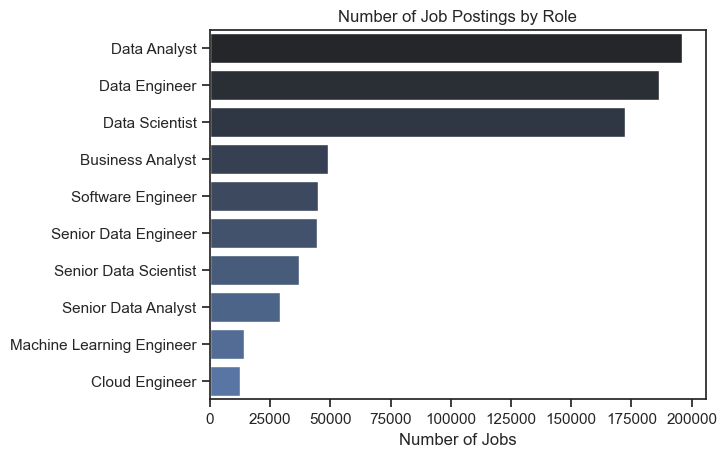

In [7]:
# which role has the highest number of job posting.
roles_count = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=roles_count, x='count', y='job_title_short', palette='dark:b', legend=False)
plt.title('Number of Job Postings by Role')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
# Insight: Data Analyst roles have the highest number of job postings, followed by Data Engineer and Data Scientist roles.

### 2. Countries to Explore

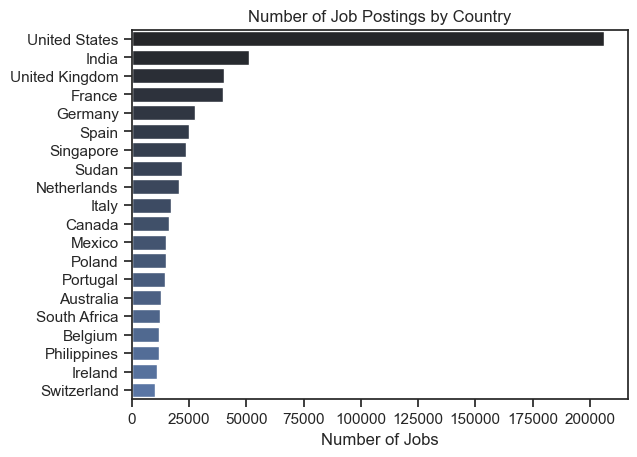

In [8]:
country_count = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style="ticks")
sns.barplot(data=country_count, x='count', y='job_country', palette='dark:b', legend=False)
plt.title('Number of Job Postings by Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
# Insight: The United States has the highest number of job postings, followed by India and the United Kingdom.

### 3. Companies to Explore

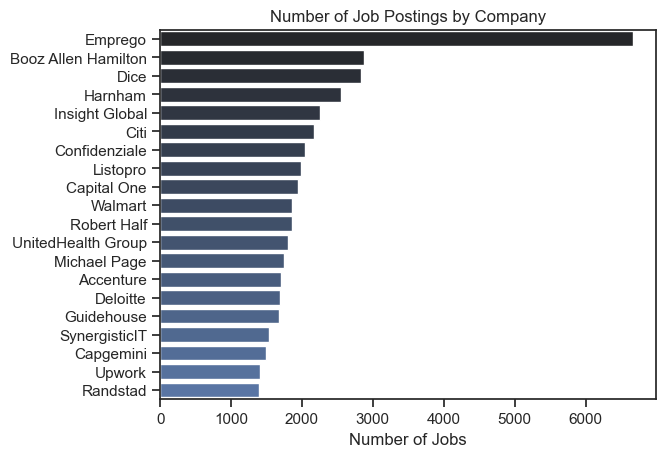

In [9]:
company_count = df['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=company_count, x='count', y='company_name', palette='dark:b', legend=False)
plt.title('Number of Job Postings by Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
# Insight: Emprego has the hightest pasting company
# change this for only the companies in the US, number of job roles for data roles in each company

# Analysis

## 1. Trending Job Posting in the US

In [10]:
# Create List of Top 3 Roles
# Focus: Data Analysts, Data Engineers, and Data Scientists
top_roles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [11]:
# Filter Data for the United States
df_US = df[df['job_country'] == 'United States'].copy()
df_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."


In [ ]:
# count number of posting jobs for each role and month
# get month number
df_US['job_posted_month_no'] = df_US['job_posted_date'].dt.month

# group by job title and month number
posting_job_month = (
    df_US.groupby(['job_title_short', 'job_posted_month_no']).size()
    .reset_index(name='job_posting_count')
)

month_no_name = {
    no: name 
    for no,name 
    in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], start=1)
}

# create Pivot table
posting_job_month_pivot = posting_job_month.pivot(index='job_posted_month_no', columns='job_title_short', values='job_posting_count')
posting_job_month_pivot = posting_job_month_pivot[top_roles]
posting_job_month_pivot.index = posting_job_month_pivot.index.map(month_no_name)

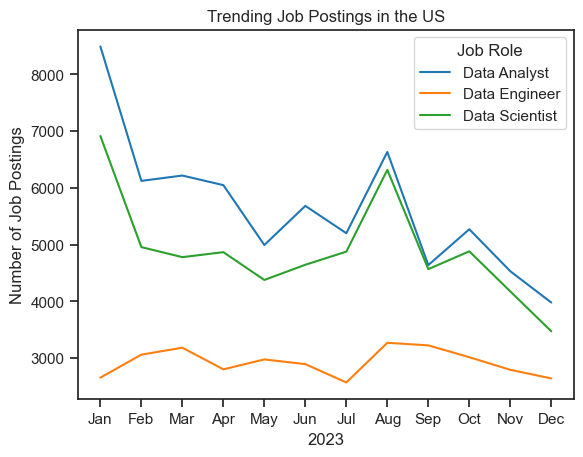

In [13]:
# Plotting Trending job posting
sns.lineplot(data=posting_job_month_pivot,dashes=False, palette='tab10')
plt.title('Trending Job Postings in the US')
plt.xlabel('2023')
plt.ylabel('Number of Job Postings')
plt.legend(title='Job Role')
plt.show()
# Insight: Data Analyst roles consistently have the highest number of job postings throughout the year.
# Data Analyst and Data Scientist roles show a similar trend, with higher number of postings in Jan and Aug,
# while Data Engineer roles have a higher number of postings in Mar and Aug.

## 2. Skills Demand in the US

In [14]:
# explode the job_skills column to analyze skill demand by job title
df_skills = df_US[['job_title_short', 'job_skills']].copy().explode('job_skills').dropna()

# count occurrences of each skill by job title
df_skills_count = (
    df_skills.groupby(['job_title_short', 'job_skills']).size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# 
df_skills_count.head(10)

,job_title_short,job_skills,count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
694,Data Engineer,sql,23958
659,Data Engineer,python,22762
483,Data Analyst,tableau,19311
438,Data Analyst,python,18382
530,Data Engineer,aws,15018


In [ ]:
# Get top 5 skills for each role
df_top_roles = (
	df_skills_count[df_skills_count['job_title_short'].isin(top_roles)]
	.groupby('job_title_short', group_keys=False)
	.apply(lambda x: x.nlargest(5, 'count'))
)
df_top_roles

,job_title_short,job_skills,count
472,Data Analyst,sql,34452
351,Data Analyst,excel,27519
483,Data Analyst,tableau,19311
438,Data Analyst,python,18382
453,Data Analyst,sas,13200
694,Data Engineer,sql,23958
659,Data Engineer,python,22762
530,Data Engineer,aws,15018
531,Data Engineer,azure,11321
689,Data Engineer,spark,11242


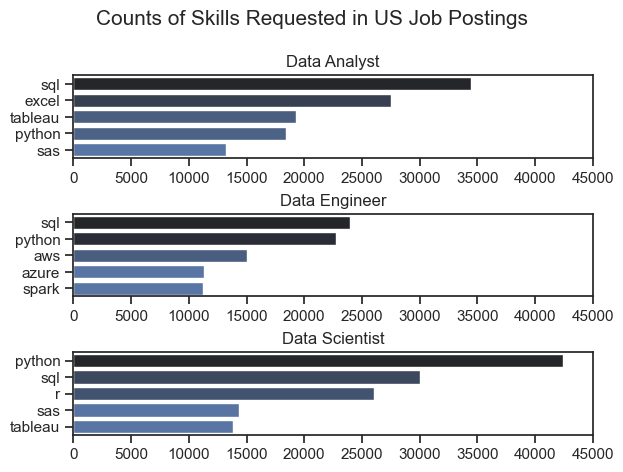

In [16]:
# plotting
fig, ax = plt.subplots(len(top_roles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(top_roles):
    data = df_top_roles[df_top_roles['job_title_short'] == job_title]
    sns.barplot(data=data, x='count', y='job_skills', ax=ax[i], hue='count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

## 3. Salary Analysis

In [ ]:
df_US_top3 = df_US[df_US['job_title_short'].isin(top_roles)]

# calculate median salary for each role to order the roles by salary
job_order =  df_US_top3.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Data Scientist', 'Data Engineer', 'Data Analyst'], dtype='object', name='job_title_short')

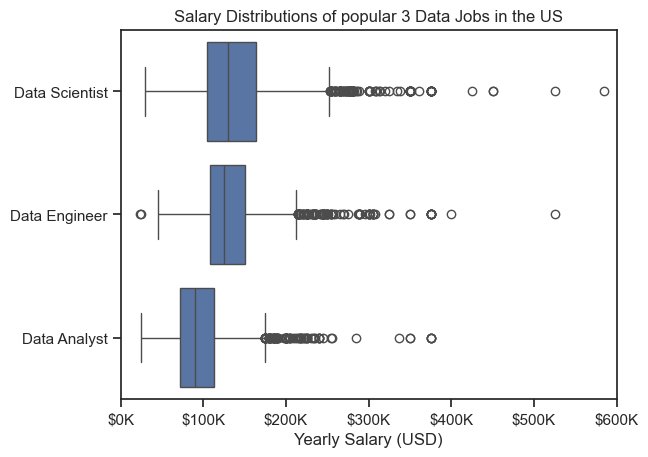

In [18]:
# salary distribution by job title
sns.boxplot(data=df_US_top3, y='job_title_short', x='salary_year_avg', order=job_order)
plt.title('Salary Distributions of popular 3 Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()
# Insights: Data Scientist roles have the highest spread in salaries, with some postings offering salaries above $500,000.
# Data Engineer roles have a slightly higher median salary than Data Analyst roles, but both have a similar interquartile range.

In [19]:
# determine the highest paying skills and most in-demand skills for data scientist roles
df_skills = df_US[['job_title_short','salary_year_avg' ,'job_skills']].copy().explode('job_skills').dropna()
df_skills = df_skills[df_skills['job_title_short'] == 'Data Scientist']
df_skills.head()

,job_title_short,salary_year_avg,job_skills
100,Data Scientist,228222.0,sql
100,Data Scientist,228222.0,r
100,Data Scientist,228222.0,python
100,Data Scientist,228222.0,express
116,Data Scientist,114000.0,r


In [ ]:
# get 10 highest paying skills
df_DS_top_pay = (
    df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
    .sort_values(by='median', ascending=False)
    .head(10)
)

df_DS_top_pay


,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [ ]:
# get 10 most in-demand skills
df_DS_skills = (
    df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
    .sort_values(by='count', ascending=False)   # select most common
    .head(10)
    .sort_values(by='median', ascending=False)  # sort by median salary 
)

df_DS_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


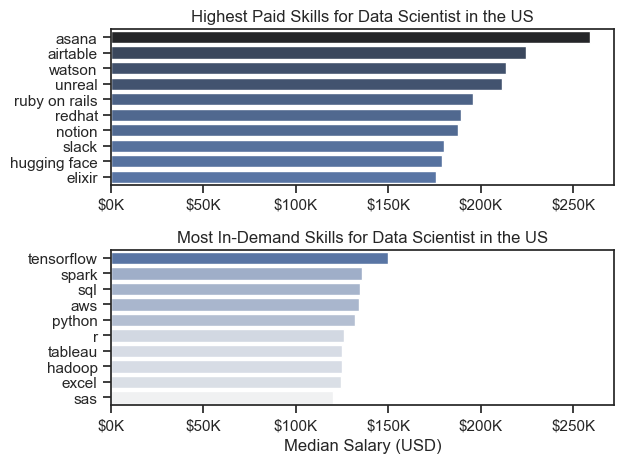

In [22]:
fig, ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills
sns.barplot(data= df_DS_top_pay, x='median', y=df_DS_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Scientist in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Scientist
sns.barplot(data= df_DS_skills, x='median', y=df_DS_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Scientist in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

## 4. Optimal Skills

In [ ]:
# count skills appearing in job postings for Data Scientist role and calculate the percentage of job postings that require each skill
df_DS_skills = (
    df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
    .sort_values(by='count', ascending=False) 
    .rename(columns={'count':'skill_count', 'median':'median_salary'}) 
)

DS_job_count = len(df_US[df_US['job_title_short'] == 'Data Scientist'].dropna(subset=['salary_year_avg' ,'job_skills']))

df_DS_skills['skill_percent'] = (df_DS_skills['skill_count'] / DS_job_count) * 100

df_DS_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,3358,131867.0,83.428571
sql,2463,134500.0,61.192547
r,2053,126000.0,51.006211
sas,1022,120000.0,25.391304
tableau,989,125000.0,24.571429
...,...,...,...
svelte,1,99150.0,0.024845
lisp,1,100000.0,0.024845
macos,1,147000.0,0.024845


In [ ]:
# dictionary of skills types
df_technology = df['job_type_skills'].copy()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    for key, value in row.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ms access',
  'word',
  'nuix',
  'spreadsheet',
  'alteryx',
  'looker',
  'sap',
  'powerpoint',
  'sharepoint',
  'ssis',
  'spss',
  'excel',
  'power bi',
  'visio',
  'msaccess',
  'esquisse',
  'splunk',
  'microstrategy',
  'datarobot',
  'tableau',
  'dax',
  'powerbi',
  'outlook',
  'ssrs',
  'sas',
  'qlik',
  'sheets',
  'cognos'],
 'programming': ['solidity',
  'clojure',
  'python',
  'php',
  'shell',
  'haskell',
  'c',
  'apl',
  't-sql',
  'go',
  'r',
  'matlab',
  'assembly',
  'mongo',
  'html',
  'julia',
  'visual basic',
  'sass',
  'lisp',
  'golang',
  'css',
  'dart',
  'vb.net',
  'fortran',
  'bash',
  'no-sql',
  'c++',
  'visualbasic',
  'vba',
  'mongodb',
  'c#',
  'objective-c',
  'delphi',
  'typescript',
  'javascript',
  'elixir',
  'lua',
  'ruby',
  'nosql',
  'f#',
  'ocaml',
  'powershell',
  'scala',
  'swift',
  'perl',
  'kotlin',
  'groovy',
  'java',
  'crystal',
  'cobol',
  'sas',
  'erlang',
  'sql',
  'rust',
  'pas

In [25]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,word
0,analyst_tools,nuix
0,analyst_tools,spreadsheet
0,analyst_tools,alteryx
...,...,...
9,sync,slack
9,sync,rocketchat
9,sync,microsoft teams
9,sync,google chat


In [ ]:
# merge df_DS_skills and df_technology
df_DS_skills_tech = df_DS_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DS_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,3358,131867.0,83.428571,programming,python
1,2463,134500.0,61.192547,programming,sql
2,2053,126000.0,51.006211,programming,r
3,1022,120000.0,25.391304,analyst_tools,sas
4,1022,120000.0,25.391304,programming,sas
...,...,...,...,...,...
180,1,99150.0,0.024845,webframeworks,svelte
181,1,100000.0,0.024845,programming,lisp
182,1,147000.0,0.024845,os,macos
183,1,152500.0,0.024845,sync,microsoft teams


In [ ]:
# limit to skills that appear in at least 10% of job postings
skill_limit = 10

# high demand skills for Data Scientist role that appear in more than 10% of job postings
df_DS_skills_tech_high_demand = df_DS_skills_tech[df_DS_skills_tech['skill_percent'] > skill_limit]

3 [-0.16295673 -0.99436233]
4 [-0.59728232 -0.82535267]


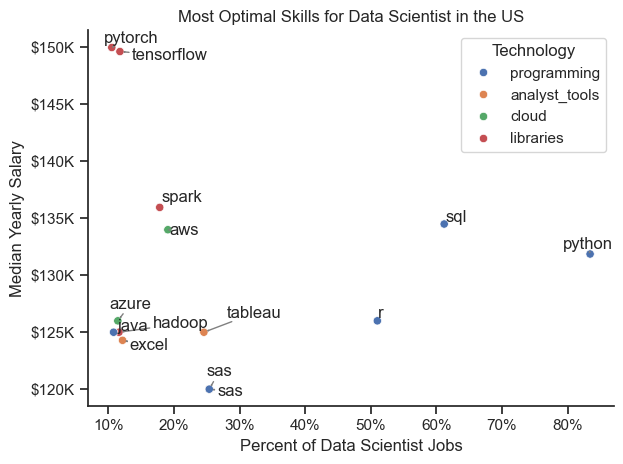

In [ ]:
sns.scatterplot(
    data=df_DS_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DS_skills_tech_high_demand['skills']):
    texts.append(plt.text(df_DS_skills_tech_high_demand['skill_percent'].iloc[i], df_DS_skills_tech_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Scientist in the US')
plt.legend(title='Technology')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()
# Insights: Libraries like pytorch, tensorflow have highest salary, but lower demand.
# python and sql are required in most data science jobs with a good salary.